In [41]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import io
import math
import pandas as pd
import mplhep as hep

hep.style.use("ALICE")

In [116]:
def plot_syst(x, ex, y, ey, ax, color, width):
    for i in range(len(x)):
        box_x = x[i] - ex
        box_y = y[i] - ey[i]
        box_width = 2 * ex
        box_height = 2 * ey[i]
        rect = patches.Rectangle((box_x, box_y), box_width, box_height, fill=False, edgecolor=color, linewidth=width)
        ax.add_patch(rect)

In [117]:
df_sig_jpsi_vs_pt = pd.read_csv('/Users/lucamicheletti/GITHUB/jpsi_flow_run3/results/sig_Jpsi_vs_pt_10_50.txt', sep=' ')
pt_min = df_sig_jpsi_vs_pt["x_min"]
pt_max = df_sig_jpsi_vs_pt["x_max"]
pt = (pt_min + pt_max) / 2.
err_pt = (pt_max - pt_min) / 2.
sig_jpsi_vs_pt = df_sig_jpsi_vs_pt["val"] / (2 * err_pt)
stat_sig_jpsi_vs_pt = df_sig_jpsi_vs_pt["stat"] / (2 * err_pt)
syst_sig_jpsi_vs_pt = df_sig_jpsi_vs_pt["syst"] / (2 * err_pt)

df_sig_jpsi_vs_rap = pd.read_csv('/Users/lucamicheletti/GITHUB/jpsi_flow_run3/results/sig_Jpsi_vs_rap_10_50.txt', sep=' ')
rap_min = df_sig_jpsi_vs_rap["x_min"]
rap_max = df_sig_jpsi_vs_rap["x_max"]
rap = (rap_min + rap_max) / 2.
err_rap = (rap_max - rap_min) / 2.
sig_jpsi_vs_rap = df_sig_jpsi_vs_rap["val"]
stat_sig_jpsi_vs_rap = df_sig_jpsi_vs_rap["stat"]
syst_sig_jpsi_vs_rap = df_sig_jpsi_vs_rap["syst"]

df_v2_jpsi_vs_pt_10_50 = pd.read_csv('/Users/lucamicheletti/GITHUB/jpsi_flow_run3/results/v2_vs_pt_10_50.txt', sep=' ')
v2_jpsi_vs_pt_10_50 = df_v2_jpsi_vs_pt_10_50["val"]
stat_v2_jpsi_vs_pt_10_50 = df_v2_jpsi_vs_pt_10_50["stat"]
syst_v2_jpsi_vs_pt_10_50 = df_v2_jpsi_vs_pt_10_50["syst"]

df_v2_jpsi_run2_vs_pt_10_30 = pd.read_csv('/Users/lucamicheletti/GITHUB/jpsi_flow_run3/results/run2_v2_vs_pt_10_30.txt', sep=' ')
pt_run2 = df_v2_jpsi_run2_vs_pt_10_30["x"]
err_pt_run2 = df_v2_jpsi_run2_vs_pt_10_30["ex"]
v2_jpsi_run2_vs_pt_10_30 = df_v2_jpsi_run2_vs_pt_10_30["val"]
stat_v2_jpsi_run2_vs_pt_10_30 = df_v2_jpsi_run2_vs_pt_10_30["stat"]
syst_v2_jpsi_run2_vs_pt_10_30 = df_v2_jpsi_run2_vs_pt_10_30["syst"]

df_v2_jpsi_run2_vs_pt_30_50 = pd.read_csv('/Users/lucamicheletti/GITHUB/jpsi_flow_run3/results/run2_v2_vs_pt_30_50.txt', sep=' ')
v2_jpsi_run2_vs_pt_30_50 = df_v2_jpsi_run2_vs_pt_30_50["val"]
stat_v2_jpsi_run2_vs_pt_30_50 = df_v2_jpsi_run2_vs_pt_30_50["stat"]
syst_v2_jpsi_run2_vs_pt_30_50 = df_v2_jpsi_run2_vs_pt_30_50["syst"]

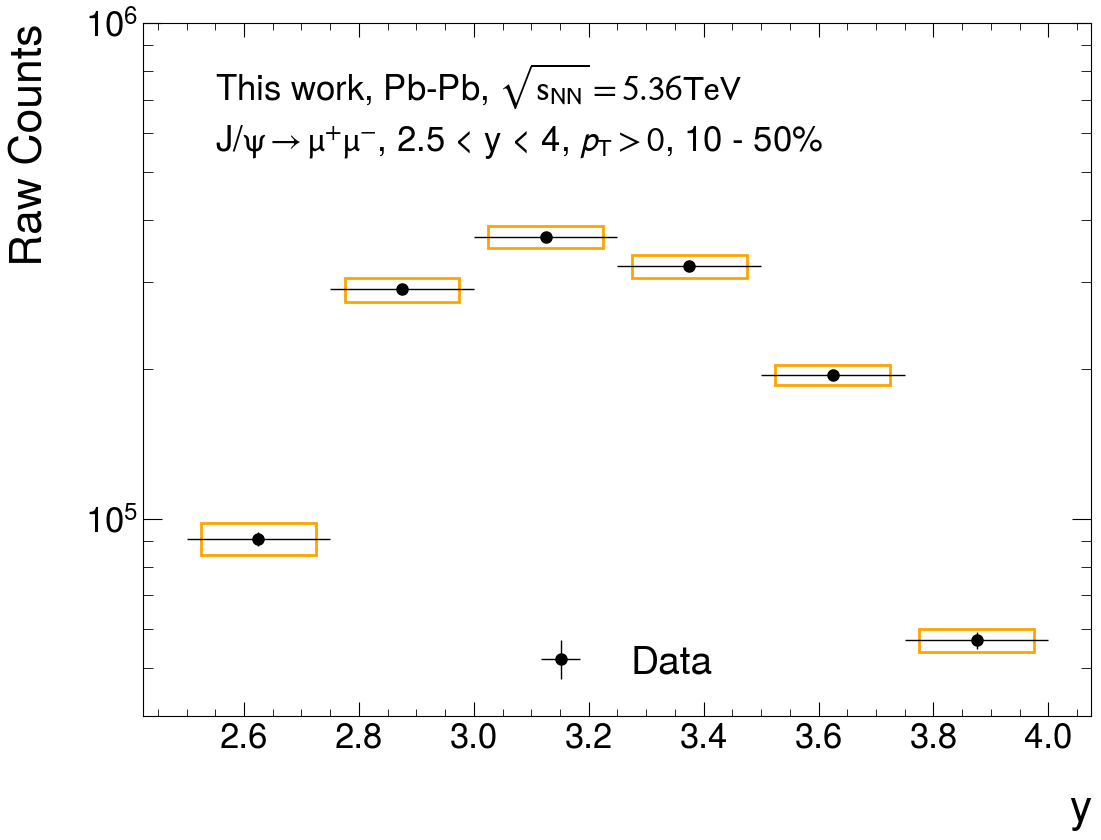

In [118]:
# Creating histogram
fig, ax = plt.subplots()
plot_syst(rap, 0.1, sig_jpsi_vs_rap, syst_sig_jpsi_vs_rap, ax, 'orange', 2)

plt.xlabel("y") 
plt.ylabel("Raw Counts") 
plt.yscale('log')
plt.ylim(4e4, 1e6)
plt.errorbar(rap, sig_jpsi_vs_rap, xerr=err_rap, yerr=stat_sig_jpsi_vs_rap, label="Data", fmt='o', color='black', ecolor='black')
#plt.errorbar(rap, sig_jpsi_vs_rap, yerr=syst_sig_jpsi_vs_rap, label="syst. error", fmt='o', color='black', ecolor='orange', alpha=0.5, elinewidth=50, capsize=0)
plt.legend(loc='lower center')
plt.text(2.55, 7e5, r'This work, Pb-Pb, $\sqrt{s_{\rm{NN}}} = 5.36 TeV$', fontsize=25)
plt.text(2.55, 5.5e5, r'J/$\psi\rightarrow\mu^{+}\mu^{-}$, 2.5 < y < 4, $\it{p}_{\rm{T}} > 0$, 10 - 50%', fontsize=25)
plt.savefig("/Users/lucamicheletti/GITHUB/jpsi_flow_run3/figures/sig_jpsi_vs_y_centr_10_50.pdf", format="pdf", bbox_inches="tight")
plt.show()

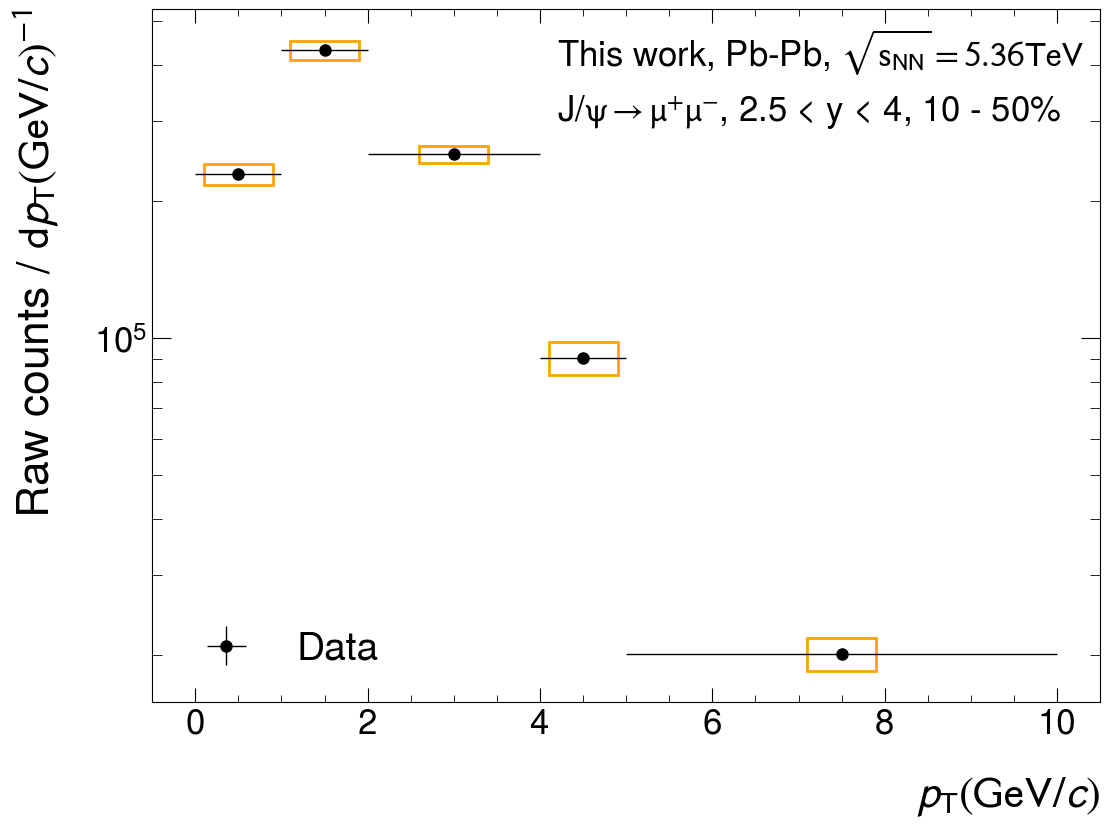

In [119]:
# Creating histogram
fig, ax = plt.subplots()
plot_syst(pt, 0.4, sig_jpsi_vs_pt, syst_sig_jpsi_vs_pt, ax, 'orange', 2)

plt.xlabel(r'$\it{p}_{\rm{T}} (\rm{GeV}/\it{c})$') 
plt.ylabel(r'Raw counts / $\rm{d}\it{p}_{\rm{T}} (\rm{GeV}/\it{c})^{-1}$') 
plt.yscale('log')
plt.errorbar(pt, sig_jpsi_vs_pt, xerr=err_pt, yerr=stat_sig_jpsi_vs_pt, label="Data", fmt='o', color='black', ecolor='black')
#plt.errorbar(pt, sig_jpsi_vs_pt, yerr=syst_sig_jpsi_vs_pt, label="syst. error", fmt='o', color='black', ecolor='orange', alpha=0.5, elinewidth=50, capsize=0)
plt.legend(loc='lower left')
plt.text(4.2, 4e5, r'This work, Pb-Pb, $\sqrt{s_{\rm{NN}}} = 5.36 TeV$', fontsize=25)
plt.text(4.2, 3e5, r'J/$\psi\rightarrow\mu^{+}\mu^{-}$, 2.5 < y < 4, 10 - 50%', fontsize=25)
plt.savefig("/Users/lucamicheletti/GITHUB/jpsi_flow_run3/figures/sig_jpsi_vs_pt_centr_10_50.pdf", format="pdf", bbox_inches="tight")
plt.show()

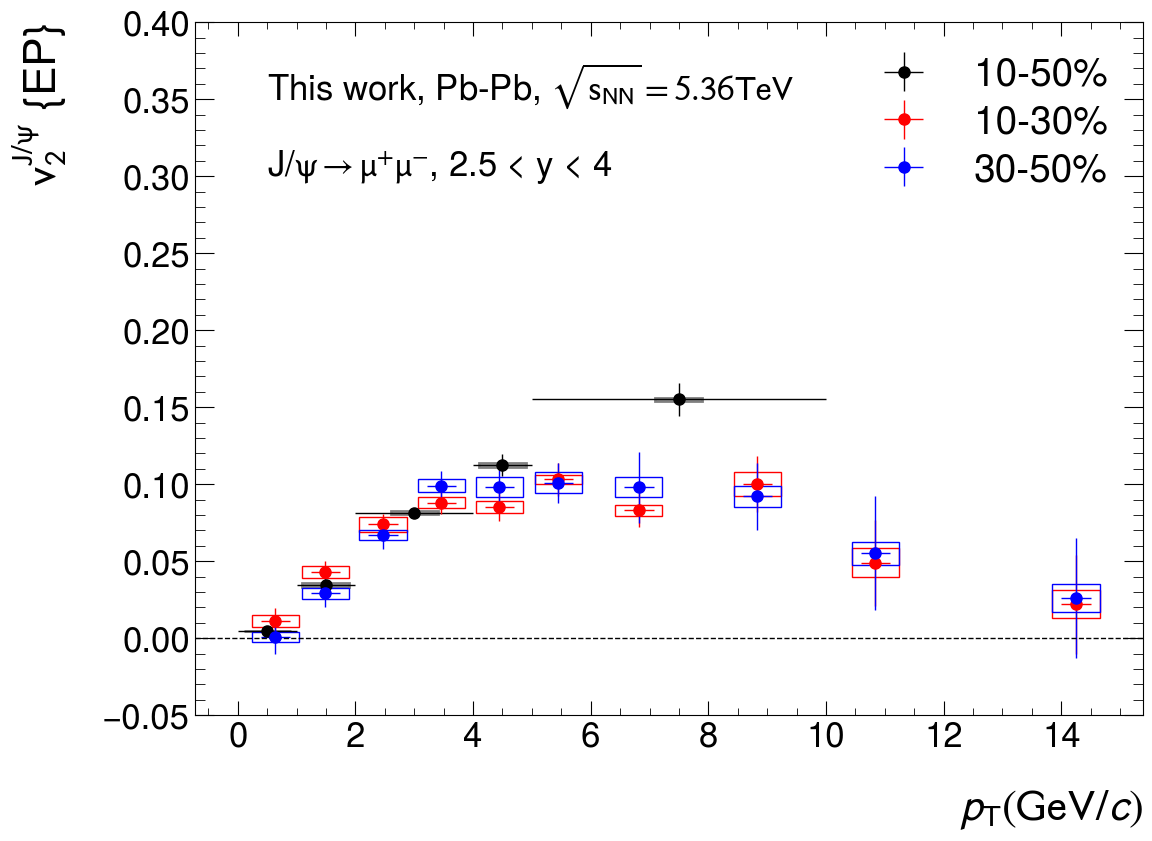

In [122]:
# Creating histogram
fig, ax = plt.subplots()
plot_syst(pt, 0.4, v2_jpsi_vs_pt_10_50, syst_v2_jpsi_vs_pt_10_50, ax, 'gray', 2)
plot_syst(pt_run2, 0.4, v2_jpsi_run2_vs_pt_10_30, syst_v2_jpsi_run2_vs_pt_10_30, ax, 'red', 1)
plot_syst(pt_run2, 0.4, v2_jpsi_run2_vs_pt_30_50, syst_v2_jpsi_run2_vs_pt_30_50, ax, 'blue', 1)

plt.xlabel(r'$\it{p}_{\rm{T}} (\rm{GeV}/\it{c})$') 
plt.ylabel(r'$v_{2}^{J/\psi}$ {EP}')
plt.ylim(-0.05, 0.40)
plt.errorbar(pt, v2_jpsi_vs_pt_10_50, xerr=err_pt, yerr=stat_v2_jpsi_vs_pt_10_50, label="10-50%", fmt='o', color='black', ecolor='black')
#plt.errorbar(pt, v2_jpsi_vs_pt_10_50, yerr=syst_v2_jpsi_vs_pt_10_50, label="syst. error", fmt='o', color='black', ecolor='red', alpha=0.5, elinewidth=50, capsize=0)
plt.errorbar(pt_run2, v2_jpsi_run2_vs_pt_10_30, xerr=err_pt_run2, yerr=stat_v2_jpsi_run2_vs_pt_10_30, label="10-30%", fmt='o', color='red', ecolor='red')
plt.errorbar(pt_run2, v2_jpsi_run2_vs_pt_30_50, xerr=err_pt_run2, yerr=stat_v2_jpsi_run2_vs_pt_30_50, label="30-50%", fmt='o', color='blue', ecolor='blue')
plt.legend(loc='upper right')
plt.text(0.5, 0.35, r'This work, Pb-Pb, $\sqrt{s_{\rm{NN}}} = 5.36 TeV$', fontsize=25)
plt.text(0.5, 0.30, r'J/$\psi\rightarrow\mu^{+}\mu^{-}$, 2.5 < y < 4', fontsize=25)
plt.axhline(y=0., color='black', linestyle='--')
plt.savefig("/Users/lucamicheletti/GITHUB/jpsi_flow_run3/figures/v2_jpsi_vs_pt_centr_10_50.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [38]:
print("--- J/psi signal extraction vs pt ---")
for id, val in enumerate(sig_jpsi_vs_pt):
    sig = val
    stat = stat_sig_jpsi_vs_pt[id]
    syst = syst_sig_jpsi_vs_pt[id]
    rel_stat = (stat / sig) * 100
    rel_syst = (syst / sig) * 100
    print(f'{pt_min[id]} - {pt_max[id]} & {sig:.0f} $\pm$ {stat:.0f} ({rel_stat:.1f}\%) $\pm$ {syst:.0f} ({rel_syst:.1f}\%) \\')

print("--- J/psi signal extraction vs y ---")
for id, val in enumerate(sig_jpsi_vs_rap):
    sig = val
    stat = stat_sig_jpsi_vs_rap[id]
    syst = syst_sig_jpsi_vs_rap[id]
    rel_stat = (stat / sig) * 100
    rel_syst = (syst / sig) * 100
    print(f'{rap_min[id]} - {rap_max[id]} & {sig:.0f} $\pm$ {stat:.0f} ({rel_stat:.1f}\%) $\pm$ {syst:.0f} ({rel_syst:.1f}\%) \\')

--- J/psi signal extraction vs pt ---
0.0 - 1.0 & 229578 $\pm$ 3009 (1.3\%) $\pm$ 12097 (5.3\%) \
1.0 - 2.0 & 431296 $\pm$ 3369 (0.8\%) $\pm$ 20773 (4.8\%) \
2.0 - 4.0 & 254248 $\pm$ 1274 (0.5\%) $\pm$ 10995 (4.3\%) \
4.0 - 5.0 & 90512 $\pm$ 1384 (1.5\%) $\pm$ 7533 (8.3\%) \
5.0 - 10.0 & 20142 $\pm$ 212 (1.1\%) $\pm$ 1651 (8.2\%) \
--- J/psi signal extraction vs y ---
2.5 - 2.75 & 91129 $\pm$ 2944 (3.2\%) $\pm$ 6776 (7.4\%) \
2.75 - 3.0 & 289814 $\pm$ 2841 (1.0\%) $\pm$ 16198 (5.6\%) \
3.0 - 3.25 & 369674 $\pm$ 3582 (1.0\%) $\pm$ 18812 (5.1\%) \
3.25 - 3.5 & 322833 $\pm$ 3309 (1.0\%) $\pm$ 17889 (5.5\%) \
3.5 - 3.75 & 194713 $\pm$ 1907 (1.0\%) $\pm$ 9205 (4.7\%) \
3.75 - 4.0 & 56808 $\pm$ 2296 (4.0\%) $\pm$ 3066 (5.4\%) \
